<a href="https://colab.research.google.com/github/sulaksh26/SportsDunia/blob/main/SportsDunia1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Overview**
1. Data Loading & Cleaning
->Loaded the Excel file using pandas.

->Standardized column names by removing extra spaces and line breaks.

->Removed fully empty rows and unnamed columns (like index columns from Excel exports).

->Converted date columns (Instance Date, Last Lead Activity, Form Initiated) into proper datetime format, handling errors gracefully.


2. Summary Statistics & Distributions
->Counted total records.

->Checked for missing values in all columns.

->Printed value counts for key fields like:

a.Lead Stage (e.g., Cold, Warm, Interested)

b.Lead Status (e.g., Verified, Unverified)

c.Course (e.g., BCA, BBA)

d.Paid Applicant (Yes/No)

3. Trend Analysis
->Extracted lead volume by month using Instance Date.

->Plotted leads over time to identify peak and low periods.

4. Campaign & Lead Origin Analysis
->Counted and printed top lead sources (Lead Origin).

->Analyzed campaign performance by seeing how many leads in each campaign converted to paid applicants.

5. Visualizations Created
->Bar chart for leads per month

->Bar chart for lead stage funnel

->Stacked bar chart for course vs paid applicant status

In [1]:
pip install pandas matplotlib seaborn openpyxl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Excel file
file_path = "/content/drive/MyDrive/Sports Dunia  -  BA/Dump1 (1) (1) (1) (1) (1) (1) (1) (1).xlsx"
df = pd.read_excel(file_path)

In [4]:
# Clean column names
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace('  ', ' ')

In [5]:
# Drop empty rows/unnamed columns
df = df.dropna(how='all')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [6]:
# Convert date columns
date_cols = ['Instance Date', 'Last Lead Activity Date', 'Form Initiated']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

/tmp/ipython-input-6-3777266579.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [7]:
# Standardize Course and Specialization
df['Course'] = df['Course'].astype(str).str.upper().str.strip()
df['Specialization'] = df['Specialization'].astype(str).str.upper().str.strip()

In [8]:
# Summary Stats
print("Total Records:", len(df))
print("\nMissing Values:\n", df.isnull().sum())
print("\nLead Stage Distribution:\n", df['Lead Stage'].value_counts())
print("\nLead Status Distribution:\n", df['Lead Status'].value_counts())
print("\nCourse Distribution:\n", df['Course'].value_counts())
print("\nPaid Applicant Distribution:\n", df['Paid Applications'].value_counts())

Total Records: 50000

Missing Values:
 Name                           0
Email                          0
Mobile                         0
Lead Origin                    0
Country                        0
State                          0
City                           0
Instance                       0
Instance Date                  0
Campaign                       0
Lead Stage                     0
Lead Status                    0
Registration Device        49782
Course                         0
Specialization                 0
Campus                         0
Last Lead Activity Date        0
Form Initiated             50000
Paid Applications          49738
Enrolment Status               0
dtype: int64

Lead Stage Distribution:
 Lead Stage
Untouched                22006
No Response              10717
Cold                     10241
NOT INTERESTED            3599
Warm                      1843
Invalid                    874
NOT ELIGIBLE               303
Application Submitted      272
Ho

<Axes: title={'center': 'Leads Over Time'}, xlabel='Month'>

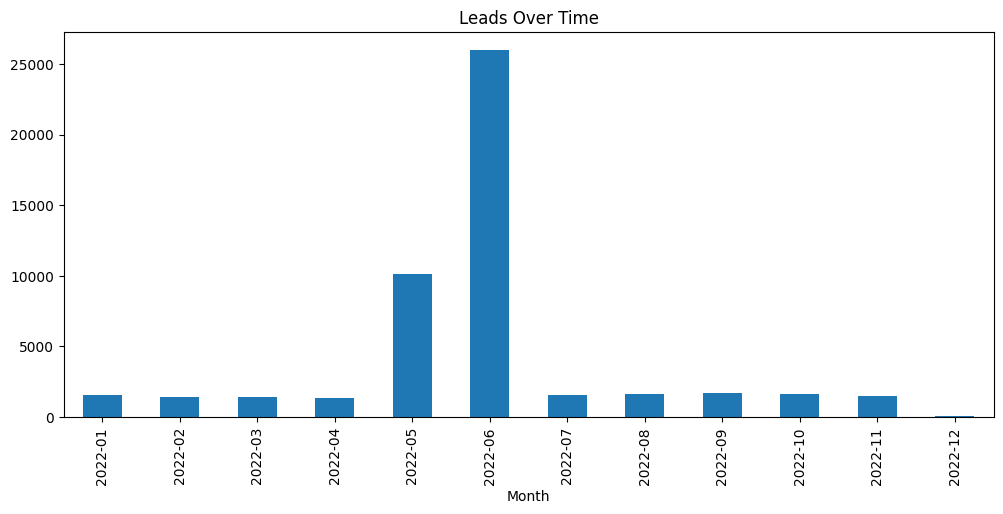

In [9]:
# Leads Over Time
df['Month'] = df['Instance Date'].dt.to_period('M')
leads_over_time = df.groupby('Month').size()
leads_over_time.plot(kind='bar', figsize=(12, 5), title="Leads Over Time")

In [10]:
# Lead Origin & Campaign
print("\nTop Lead Origins:\n", df['Lead Origin'].value_counts())
print("\nCampaign-wise Paid Applicant Status:\n", df.groupby('Campaign')['Paid Applications'].value_counts().unstack().fillna(0))


Top Lead Origins:
 Lead Origin
API       49782
Online      218
Name: count, dtype: int64

Campaign-wise Paid Applicant Status:
 Paid Applications     BSc/SOC/Application Form  \
Campaign                                         
ABC/70/API                                 0.0   
ABC/79/API                                 1.0   
ABC/86/API                                 2.0   
ABC/87/API                                 0.0   
ABC/88/API                                 0.0   
ABC/89/API                                 0.0   
ABC/90/API                                 0.0   
ABC/90_EI/API                              0.0   
ABC/90_RV/API                              0.0   
ABC/Emailer/Online                         0.0   
ABC/Liveform/Online                        0.0   

Paid Applications     BSc/SOC/Application Form,BSc/SOIS/Application Form  \
Campaign                                                                   
ABC/70/API                                                         0

<Axes: title={'center': 'Lead Stage Funnel'}, xlabel='Lead Stage'>

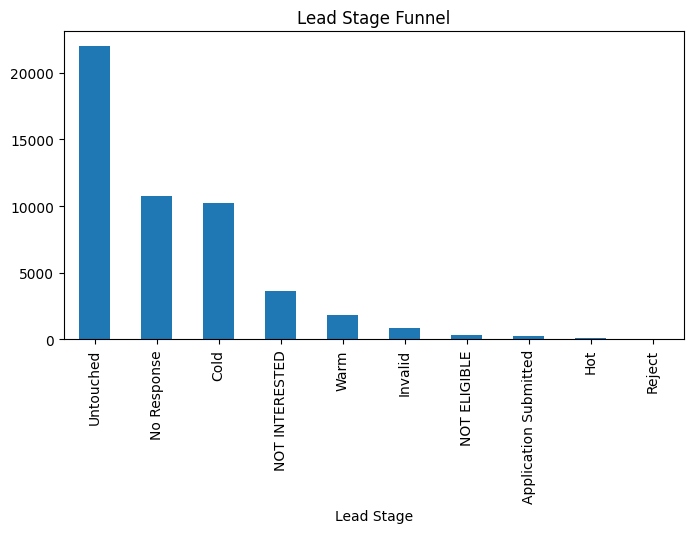

In [11]:
# Funnel (Lead Stage to Paid Applicant)
funnel = df['Lead Stage'].value_counts()
funnel.plot(kind='bar', figsize=(8, 4), title="Lead Stage Funnel")

<Axes: title={'center': 'Course vs Enrollment Status'}, xlabel='Course'>

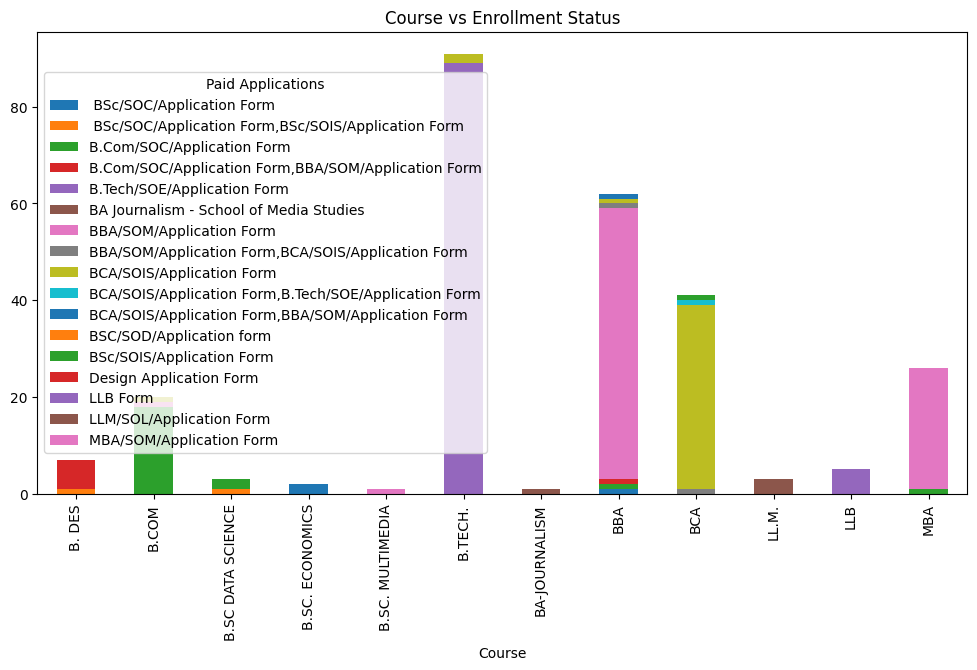

In [12]:
# Course vs Paid Applicant
df.groupby('Course')['Paid Applications'].value_counts().unstack().fillna(0).plot(kind='bar', stacked=True, figsize=(12, 6), title='Course vs Enrollment Status')

In [13]:
# State/City Analysis
print("\nTop States:\n", df['State'].value_counts().head(10))
print("\nTop Cities:\n", df['City'].value_counts().head(10))


Top States:
 State
Karnataka         17625
Tamil Nadu         7889
Kerala             4317
Maharashtra        2662
Andhra Pradesh     2571
Uttar Pradesh      1981
Bihar              1670
West Bengal        1593
Telangana          1297
Delhi              1231
Name: count, dtype: int64

Top Cities:
 City
Bengaluru Rural       13440
Chennai                3648
New Delhi              1231
Hyderabad              1107
Mumbai                 1094
Kolkata                1031
Kochi                   690
Patna                   591
City Not Available      546
Pune                    509
Name: count, dtype: int64


In [14]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>